In [1]:
import importlib
import matplotlib.pyplot as plt
from modules import PointGenerator  # 초기 import
importlib.reload(PointGenerator)  # 모듈 갱신
import numpy as np

# 클래스 인스턴스 생성
data_num = 1000
data_type = "bigdiamond"
idx = 1
generator = PointGenerator.PointGenerator(data_num)

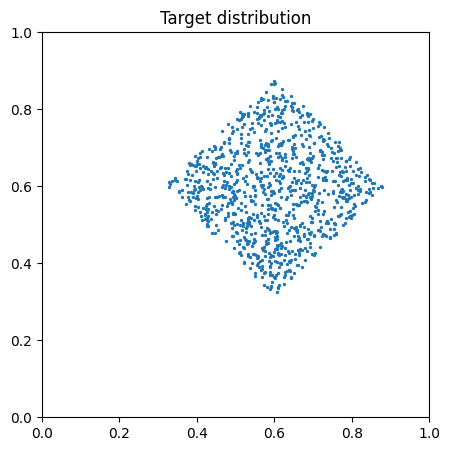

In [8]:
# 원하는 분포 생성 (예: 'curve')

generate_function = generator.generate_biased_diamond # 이걸 바꿔주면 된다.
origin_data = generate_function()

# 그래프 그리기
plt.figure(figsize=(5, 5))
plt.scatter(origin_data[:, 0], origin_data[:, 1], s=2.0)
plt.title('Target distribution')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

In [12]:
def transform_data(origin_data, v1, v2):
    # (0.5, 0.5)를 원점으로 이동
    shifted_data = origin_data - np.array([0.6, 0.6])
    # v1과 v2를 열벡터로 갖는 변환 행렬 구성
    A = np.column_stack((v1, v2))
    # 변환 행렬의 역행렬을 이용하여 새로운 좌표계로 변환
    transformed = shifted_data @ np.linalg.inv(A).T
    return transformed

new_data  = transform_data(origin_data, (1, 1), (1, -1))
new_data

array([[ 0.0799013 ,  0.01579243],
       [ 0.14107651, -0.06646444],
       [ 0.04487014, -0.09723755],
       ...,
       [ 0.02388166,  0.11322465],
       [-0.08820407, -0.10497097],
       [-0.12419048, -0.03909578]])

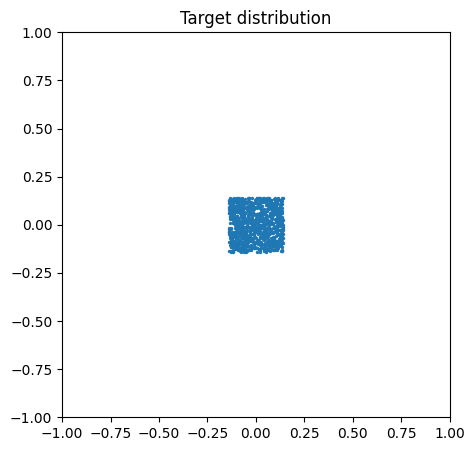

In [13]:
# 그래프 그리기
plt.figure(figsize=(5, 5))
plt.scatter(new_data[:, 0], new_data[:, 1], s=2.0)
plt.title('Target distribution')
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.show()